In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


 

In [2]:
df = pd.read_csv('/Users/shreyasingh/Downloads/Timeseries/exchange_rate 2.csv')

# 1: Data Preparation and Exploration

In [4]:
df.head()

,date,Ex_rate
0,01/01/1990 00:00,0.7855
1,02/01/1990 00:00,0.7818
2,03/01/1990 00:00,0.7867
3,04/01/1990 00:00,0.7860
4,05/01/1990 00:00,0.7849


In [5]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
df.shape

(7588, 2)

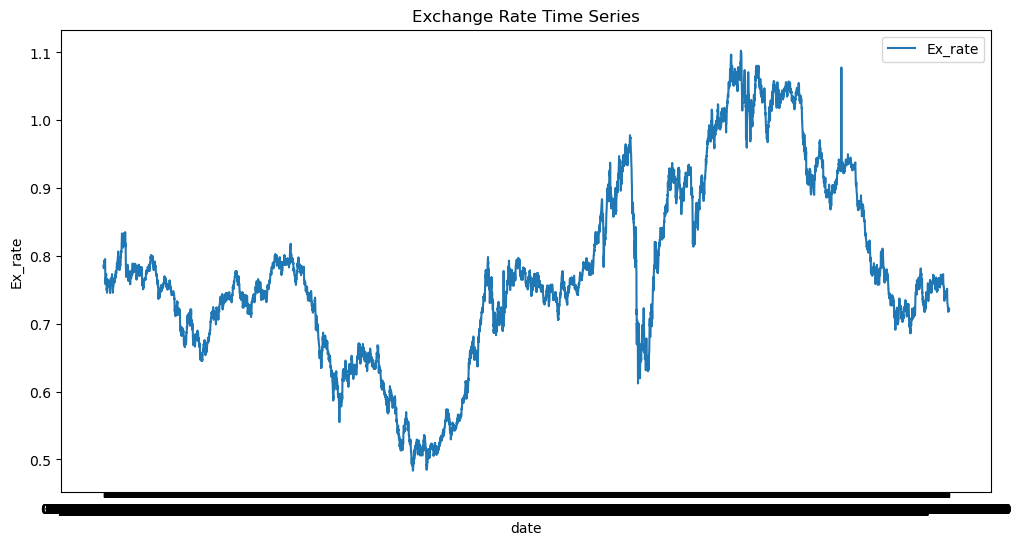

In [8]:
# Plot the time series for each currency
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label='Ex_rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('date')
plt.ylabel('Ex_rate')
plt.legend()
plt.show()

In [9]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
date       0
Ex_rate    0
dtype: int64


In [10]:
# Identify and handle anomalies (example: remove outliers beyond 3 standard deviations)
mean = df['Ex_rate'].mean()
std_dev = df['Ex_rate'].std()
anomaly_threshold = 3 * std_dev

In [11]:
# Filter out anomalies
df_cleaned = df[(df['Ex_rate'] >= mean - anomaly_threshold) & 
                (df['Ex_rate'] <= mean + anomaly_threshold)]

print("Data after anomaly removal:")
print(df_cleaned.describe())


Data after anomaly removal:
           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


In [12]:
time_series = df['Ex_rate']


# 2: Model Building - ARIMA

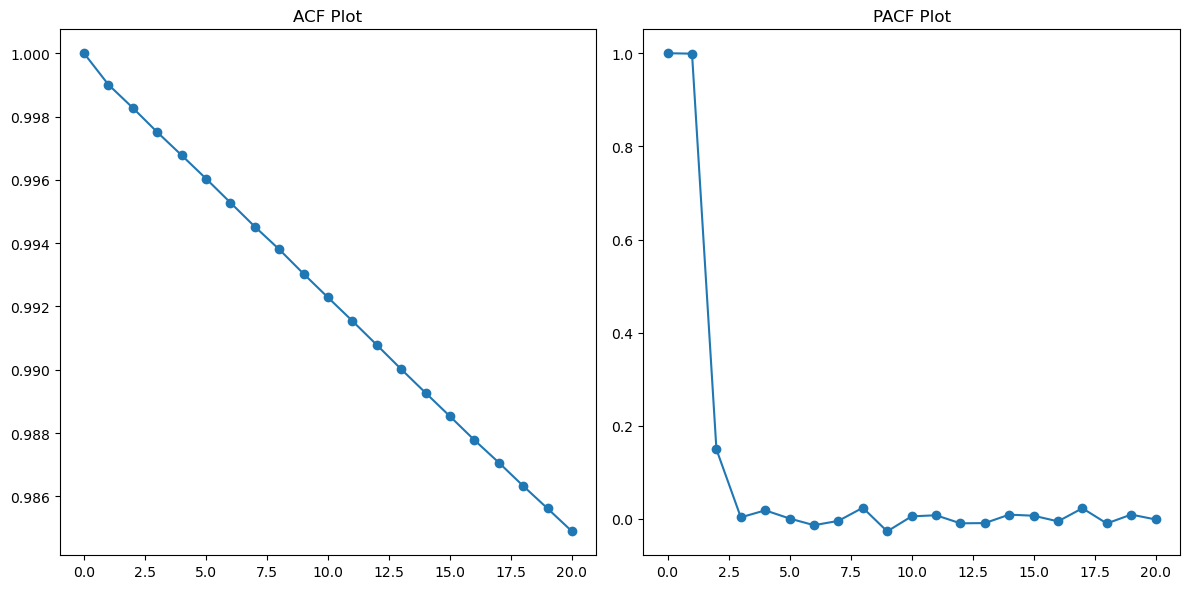

In [14]:
#Parameter Selection for ARIMA using ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf(time_series, nlags=20), marker='o')
plt.title('ACF Plot')

plt.subplot(122)
plt.plot(pacf(time_series, nlags=20), marker='o')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [15]:
# Choose initial parameters (example: p=1, d=1, q=1 based on ACF and PACF)
p, d, q = 1, 1, 1


In [16]:
#Model Fitting
model = ARIMA(time_series, order=(p, d, q))
fitted_model = model.fit()

print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 09 Dec 2024   AIC                         -56102.322
Time:                        17:06:16   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

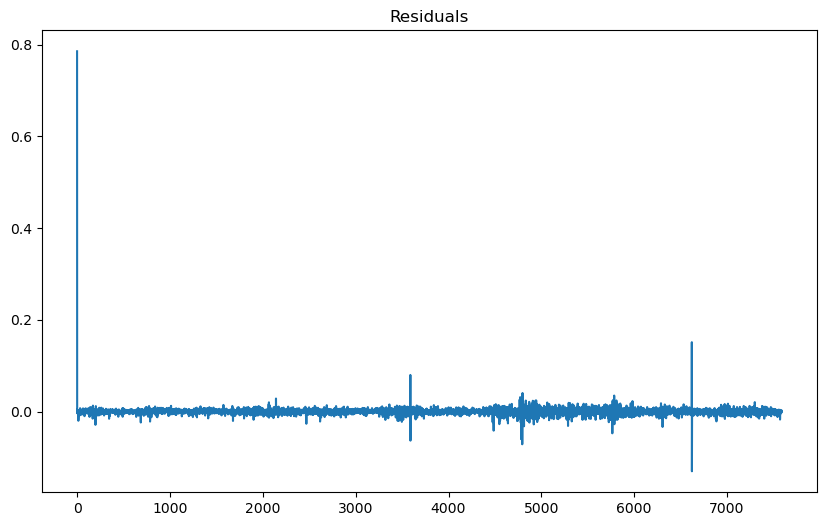

In [17]:
# Plot residuals to check for patterns
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()


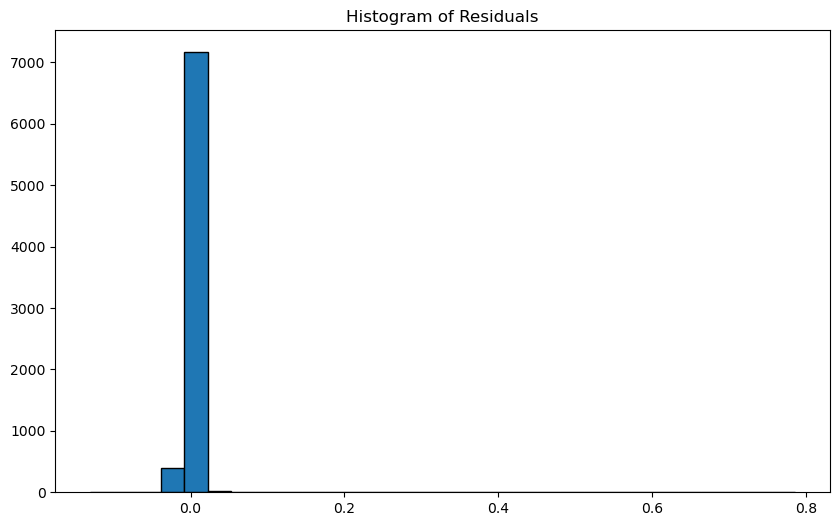

In [18]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.show()

In [19]:
# Perform residual diagnostics
print("Residuals Mean:", residuals.mean())
print("Residuals Variance:", residuals.var())



Residuals Mean: 9.38703687997255e-05
Residuals Variance: 0.00011727229646458121


In [20]:
# Perform out-of-sample forecasting  
forecast_steps = 10
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

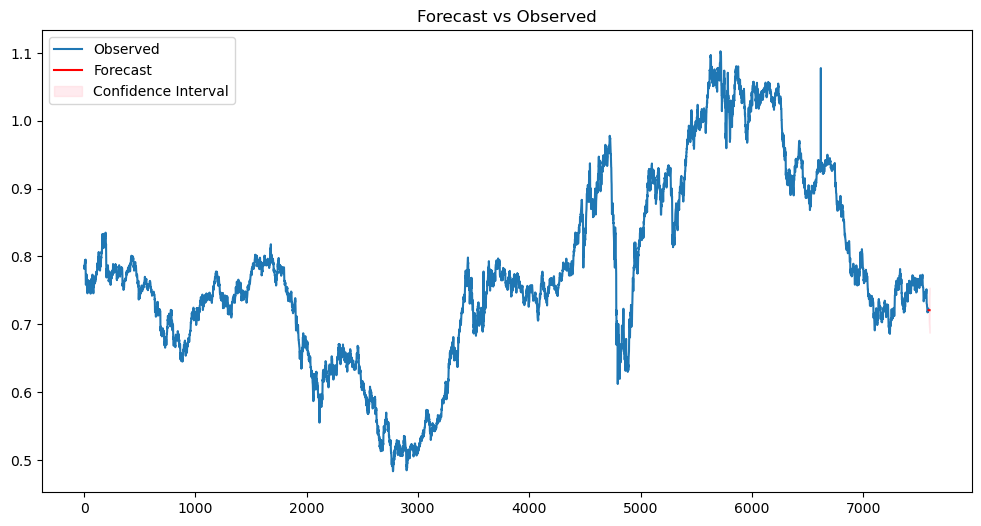

In [21]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Forecast vs Observed')
plt.legend()
plt.show()

In [22]:
#use Holt-Winters with additive seasonality
model = ExponentialSmoothing(
    time_series,
    seasonal='add',
    seasonal_periods=12,
    trend='add',
    damped_trend=True
)

In [23]:
# Assuming 'Currency_Value' is the target column
time_series = df['Ex_rate']

In [24]:
# Model Fitting and Parameter Optimization
fitted_model = model.fit()

In [25]:
# Print the summary of the fitted model
print(fitted_model.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77623.250
Trend:                         Additive   BIC                         -77505.367
Seasonal:                      Additive   AICC                        -77623.150
Seasonal Periods:                    12   Date:                 Mon, 09 Dec 2024
Box-Cox:                          False   Time:                         17:06:18
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8682631                alpha                 True
smoothing_trend          

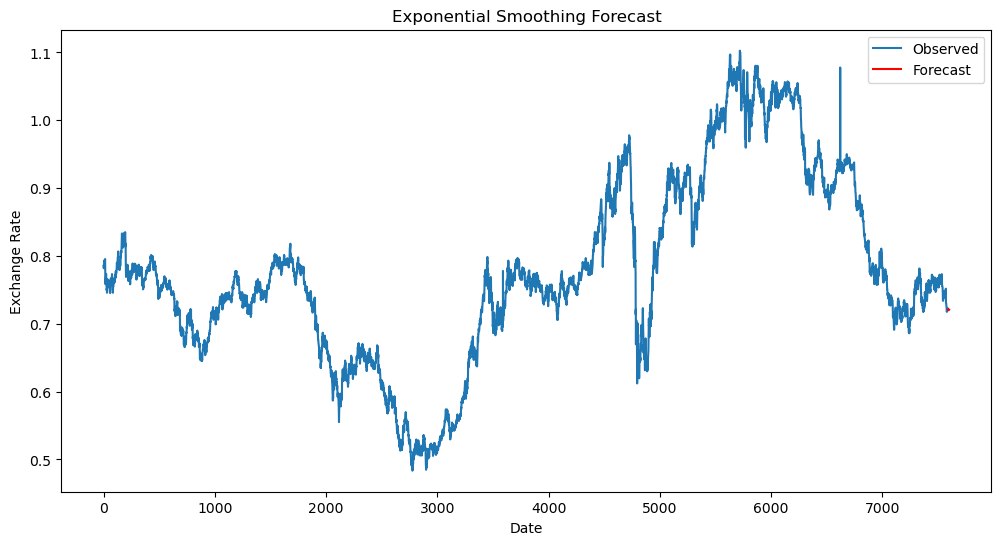

In [26]:
 # Forecast future values (e.g., next 12 months)
forecast_steps = 12
forecast = fitted_model.forecast(steps=forecast_steps)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [27]:
#Compute Error Metrics
# Replace 'actual_values' with actual values of the exchange rate for the forecast period
actual_values = np.array([/* actual exchange rates for the forecast period */])


SyntaxError: invalid syntax (800758684.py, line 3)

In [ ]:
# ARIMA forecast (example)
forecast_arima = np.array([/* ARIMA forecasted values */])

In [ ]:
# Exponential Smoothing forecast (example)
forecast_exp_smooth = np.array([/* Exponential Smoothing forecasted values */])

In [ ]:
# Calculate MAE, RMSE, and MAPE for both models
def compute_error_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = mean_absolute_percentage_error(actual, forecast)
    return mae, rmse, mape

mae_arima, rmse_arima, mape_arima = compute_error_metrics(actual_values, forecast_arima)
mae_exp_smooth, rmse_exp_smooth, mape_exp_smooth = compute_error_metrics(actual_values, forecast_exp_smooth)

# Display error metrics
print(f"ARIMA Model Error Metrics:")
print(f"MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")

print(f"\nExponential Smoothing Model Error Metrics:")
print(f"MAE: {mae_exp_smooth}, RMSE: {rmse_exp_smooth}, MAPE: {mape_exp_smooth}")


In [ ]:
# Visualize the forecast and actual values for comparison
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Values', color='black')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(forecast_exp_smooth, label='Exponential Smoothing Forecast', color='blue', linestyle='--')
plt.title('Model Comparison')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
# Split the data into training and testing sets
train_data = df.iloc[:-365]  # Use all but the last year for training
test_data = df.iloc[-365:]  # Use the last year for testing


In [ ]:
# Fit an Exponential Smoothing model (Holt-Winters with trend and seasonality)
model_hw = ExponentialSmoothing(
    train_data['Ex_rate'],
    seasonal='add',
    seasonal_periods=365,
    trend='add'
)
hw_fit = model_hw.fit()

In [ ]:
# Forecast for the test period
hw_forecast = hw_fit.forecast(len(test_data))

In [ ]:
# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Evaluation metrics for the Holt-Winters model
mae_hw = mean_absolute_error(test_data, hw_forecast)
rmse_hw = np.sqrt(mean_squared_error(test_data, hw_forecast))
mape_hw = np.mean(np.abs((test_data['Exchange_Rate_USD_AUD'] - hw_forecast) / test_data['Exchange_Rate_USD_AUD'])) * 100

print(f"Evaluation Metrics for Holt-Winters Model:")
print(f"Mean Absolute Error (MAE): {mae_hw:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_hw:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_hw:.2f}%")

# Comparison
print("\nComparison:")
print("Holt-Winters Exponential Smoothing performed well. Further comparison with ARIMA metrics can refine the conclusion.")

In [ ]:
# Function to calculate Theil's U-statistic
def theils_u_statistic(y_true, y_pred):
    numerator = np.sqrt(np.mean((y_pred - y_true) ** 2))
    denominator = np.sqrt(np.mean(y_true ** 2)) + np.sqrt(np.mean(y_pred ** 2))
    return numerator / denominator

In [ ]:

# Check stationarity using ADF test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")
    return result[1] < 0.05

stationary = adf_test(df['ExchangeRate'])
print(f"Is the time series stationary? {'Yes' if stationary else 'No'}")


In [ ]:
# Seasonal Decomposition
decomposition = seasonal_decompose(df['ExchangeRate'], model='additive', period=12)
decomposition.plot()
plt.show()

# Differencing to make the series stationary if needed
if not stationary:
    df['ExchangeRate_diff'] = df['ExchangeRate'].diff().dropna()

 

In [ ]:
# Auto-ARIMA Hyperparameter Tuning
model = auto_arima(
    df['ExchangeRate'].dropna(),
    seasonal=True,
    m=12,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(model.summary())
